# OpenCV Contours
In general contours are the boundary pixels of an object/image that has same color and intensity. They are useful in shape analysis and object detection/recognition using traditional computer vision algorithms. You can do a lot of analysis based on contours to arrive at a solution to many computer vision problems. 

In this Notebook, you will learn the approach and many different aspects of contour analysis.

## <font style="color:rgb(50,120,229)">Objective </font>
 - Learn how to find contour.
 - Learn drawing contour.
 - Learn various properties, such as **centre of mass, area of parameter, fitting bounding box and ellipse**

## 1. Import Libraries

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

if 'google.colab' in str(get_ipython()):
    print("Downloading Code to Colab Environment")
    !wget https://www.dropbox.com/sh/vmzfc3wy5wwfrvi/AACY8uK6k6aTF5QJahLkAplta?dl=1 -O module-code.zip -q --show-progress
    !unzip -qq module-code.zip
else:
    pass

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'

## 2. Load an image and display

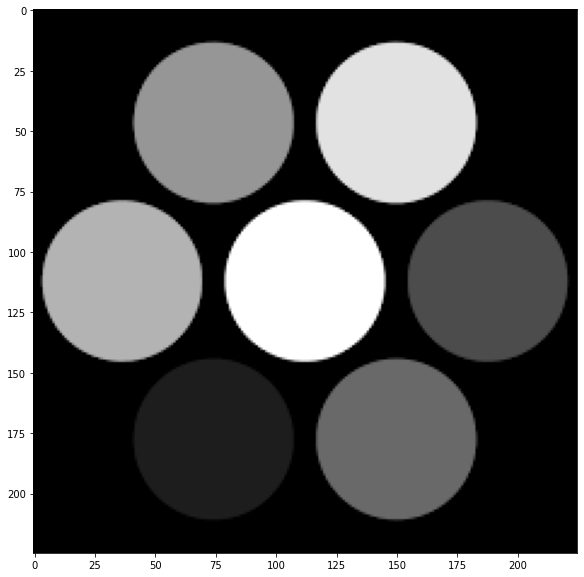

In [3]:
imagePath = 'circles.png'
image = cv2.imread(imagePath)
# Convert to grayscale
imageGray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# Display image
plt.imshow(imageGray)

## 3. Threshold

Thresholding is required to convert the image to black and white, highlighting the objects-of-interest to make things easy for the contour detection algorithm. Thresholding turns the border of the object in the image completely white, with all pixels having the same intensity. The algorithm can now detect the borders of the objects from these white pixels.

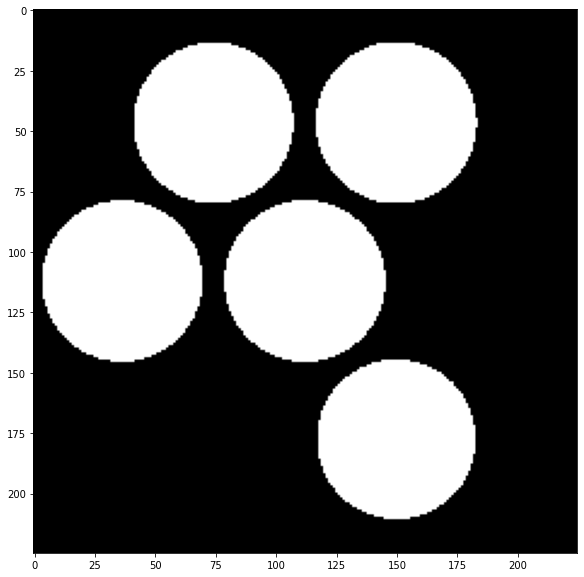

In [4]:
ret, thresh = cv2.threshold(imageGray, 90, 255, cv2.THRESH_BINARY)
plt.imshow(thresh)

## 4. Contour Finding
There are many algorithms for finding Contours. Here, We will use the OpenCV function [**`findContours`**](https://docs.opencv.org/4.5.2/d3/dc0/group__imgproc__shape.html#gadf1ad6a0b82947fa1fe3c3d497f260e0) to get the boundaries of the objects.

### <font style="color:rgb(8,133,37)">Function Syntax </font>

```python
contours, hierarchy	=	cv.findContours(image, mode, method[, contours[, hierarchy[, offset]]])
```

Where,


- **`image`**	- input image (8-bit single-channel). Non-zero pixels are treated as 1's. Zero pixels remain 0's, so the image is treated as binary . You can use compare, inRange, threshold , adaptiveThreshold, Canny, and others to create a binary image out of a grayscale or color one. 
- **`contours`** - Detected contours. Each contour is stored as a vector of points.
- **`hierarchy`** - Optional output vector containing information about the image topology.
- **`mode`** - Contour retrieval mode, ( RETR_EXTERNAL, RETR_LIST, RETR_CCOMP, RETR_TREE )
- **`method`** - Contour approximation method. ( CHAIN_APPROX_NONE, CHAIN_APPROX_SIMPLE, CHAIN_APPROX_TC89_L1 etc )
- **`offset`** - Optional offset by which every contour point is shifted. This is useful if the contours are extracted from the image ROI and then they should be analyzed in the whole image context.

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

[**`drawContours()`**](https://docs.opencv.org/4.5.2/d6/d6e/group__imgproc__draw.html#ga746c0625f1781f1ffc9056259103edbc)

In [5]:
# Find all contours in the image.
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [6]:
# Number of contours.
print("Number of contours found = {}".format(len(contours)))

# Hierarchy.
print("\nHierarchy : \n{}".format(hierarchy))

Number of contours found = 5

Hierarchy : 
[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [-1  3 -1 -1]]]


# 5.1 Drawing Contours


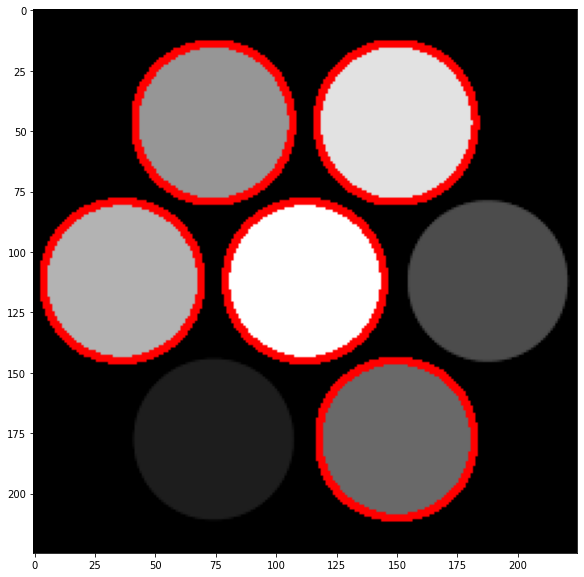

In [7]:
# Create a copy of the original image.
imageCopy1 = imageGray.copy()
imageCopy1 = cv2.cvtColor(imageCopy1, cv2.COLOR_GRAY2BGR)
# Draw all the contours.
cv2.drawContours(imageCopy1, contours, -1, (0,0,255), 2)
plt.imshow(imageCopy1[:,:,::-1])

Here we can see that both the inner and outer contours have been detected. What if we only want to detect the outer contours? In that case, we can use `cv2.RETR_EXTERNAL` mode while calling `cv2.findContours` function. To acquire number of contours, we simply find the length of the array.

Number of contours found = 5


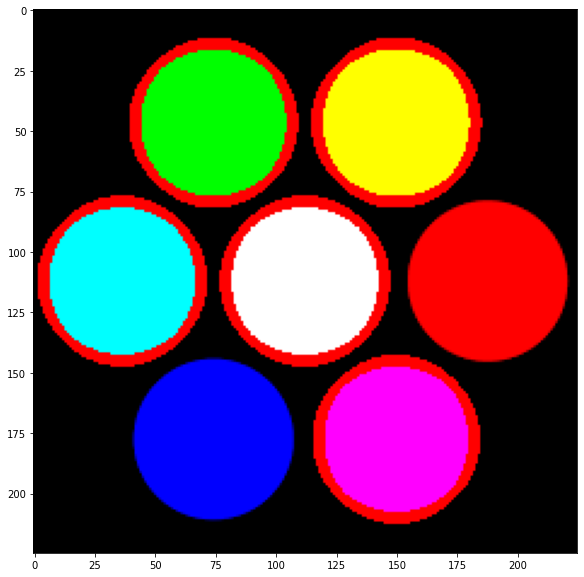

In [20]:
# Find external contours in the image.
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("Number of contours found = {}".format(len(contours)))

# Create a copy of the original image.
imageCopy2 = image.copy()

# Draw all the contours.
cv2.drawContours(imageCopy2, contours, -1, (0,0,255), 4)

# Display.
plt.imshow(imageCopy2[:,:,::-1])

## 5.2 Draw nth contour
Let's see how to draw only the 4th contour. Note that right now we do not know the numbering of contour in terms of the shapes present in the figure.

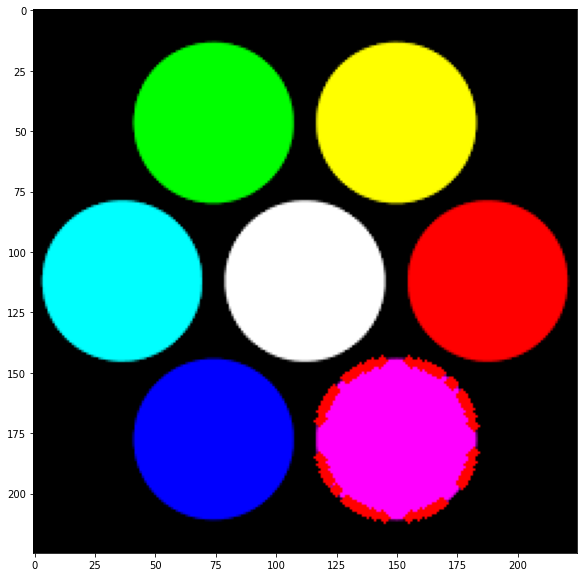

In [21]:
# Create a copy of the original image.
imageCopy3 = image.copy()
# Draw contours.
cv2.drawContours(imageCopy3, contours[0], -1, (0,0,255), 4)
# Display.
plt.imshow(imageCopy3[:,:,::-1])

## 6. Contour Properties
Once we detect the contours from an image, it becomes very easy to do further analysis on the basis of various properties of contours. Let us discuss a few useful properties of contours.

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

[**`moments()`**](https://docs.opencv.org/4.5.2/d8/d23/classcv_1_1Moments.html)

[**`contourArea()`**](https://docs.opencv.org/4.5.2/d3/dc0/group__imgproc__shape.html#ga2c759ed9f497d4a618048a2f56dc97f1)

[**`boundingRect()`**](https://docs.opencv.org/4.5.2/db/dd6/classcv_1_1RotatedRect.html#a055a5d35e50bce65e3b1dee318dd3044)

[**`minEnclosingCircle()`**](https://docs.opencv.org/4.5.2/d3/dc0/group__imgproc__shape.html#ga8ce13c24081bbc7151e9326f412190f1)

[**`fitEllipse()`**](https://docs.opencv.org/4.5.2/d3/dc0/group__imgproc__shape.html#gaf259efaad93098103d6c27b9e4900ffa)

[**`minAreaRect`**](https://docs.opencv.org/4.5.2/d3/dc0/group__imgproc__shape.html#ga3d476a3417130ae5154aea421ca7ead9)


### <font style="color:rgb(50,120,229)"> 6.1 Center of Mass or Centroid</font>
Let us find the center of mass for each contour.

In [10]:
# Find all contours in the image.
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# Create a copy of the original image.
imageCopy4 = image.copy()

# Draw all the contours.
cv2.drawContours(imageCopy4, contours, -1, (0,0,255), 3)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

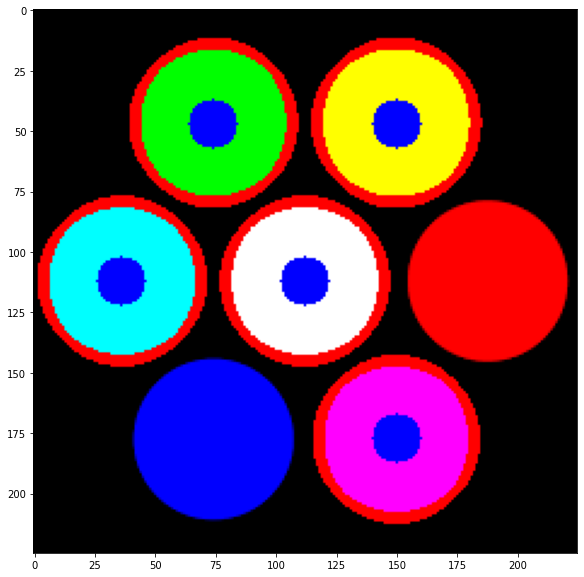

In [11]:
for cnt in contours:
    # We will use the contour moments
    # to find the centroid.
    M = cv2.moments(cnt)
    x = int(round(M["m10"]/M["m00"]))
    y = int(round(M["m01"]/M["m00"]))
    
    # Mark the center.
    cv2.circle(imageCopy4, (x,y), 10, (255,0,0), -1)
    
# Display.
plt.imshow(imageCopy4[:,:,::-1])

For the octagone shape, you can see that two points were marked very close, almost overlapping. That is because there are two contours having centroid close to each other.

### <font style="color:rgb(50,120,229)">6.2 Area and Perimeter</font>

In [12]:
for index,cnt in enumerate(contours):
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)
    print("Contour #{} has area = {} and perimeter = {}".format(index+1,area,perimeter))

Contour #1 has area = 3311.5 and perimeter = 215.23758828639984
Contour #2 has area = 3414.0 and perimeter = 219.48022747039795
Contour #3 has area = 3389.0 and perimeter = 217.48022985458374
Contour #4 has area = 3399.0 and perimeter = 217.48022842407227
Contour #5 has area = 3365.0 and perimeter = 216.65180253982544


### <font style="color:rgb(50,120,229)">6.3 Bounding Boxes</font>

There are 2 type of bounding boxes we can create around a contour:

1. A vertical rectangle
2. A rotated rectangle - This is the bounding box with the minimum area

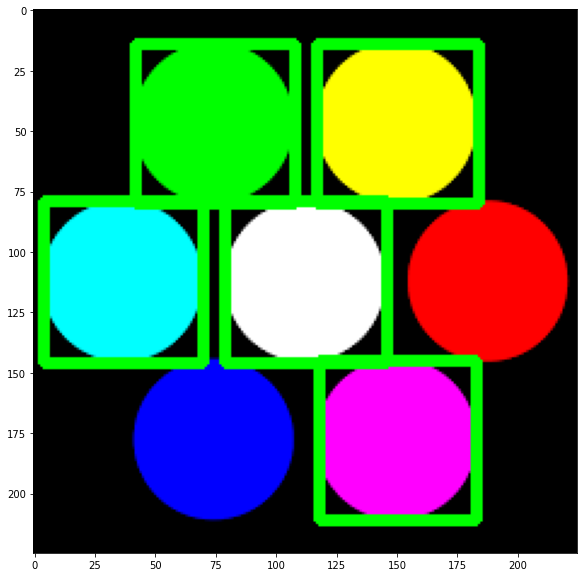

In [13]:
# Create a copy of the original image.
imageCopy5 = image.copy()
for cnt in contours:
    # Vertical rectangle.
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(imageCopy5, (x,y), (x+w,y+h), (0,255,0), 4)
# Display.
plt.imshow(imageCopy5[:,:,::-1])

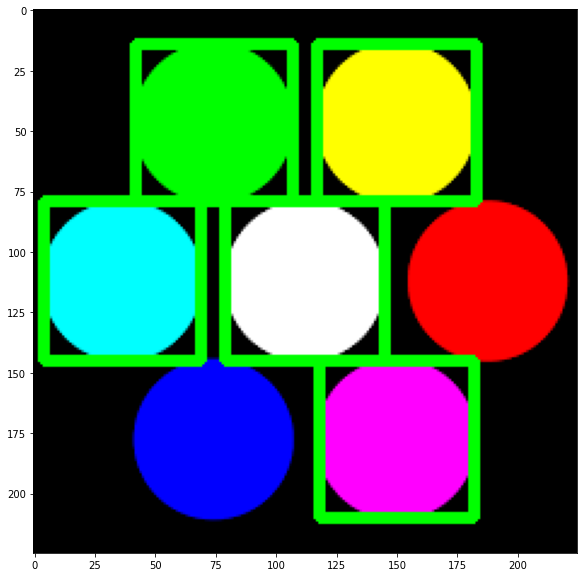

In [14]:
# Create a copy of the original image.
imageCopy6 = image.copy()
for cnt in contours:
    # Rotated bounding box
    box = cv2.minAreaRect(cnt)
    boxPts = np.int0(cv2.boxPoints(box))
    # Draw contours.
    cv2.drawContours(imageCopy6, [boxPts], -1, (0,255,0), 4)
plt.imshow(imageCopy6[:,:,::-1])

### <font style="color:rgb(50,120,229)">6.4 Fit a circle and ellipse</font>
Circle fitting can be compared with vertical bounding box fitting. It works best with images with square aspect ratio.

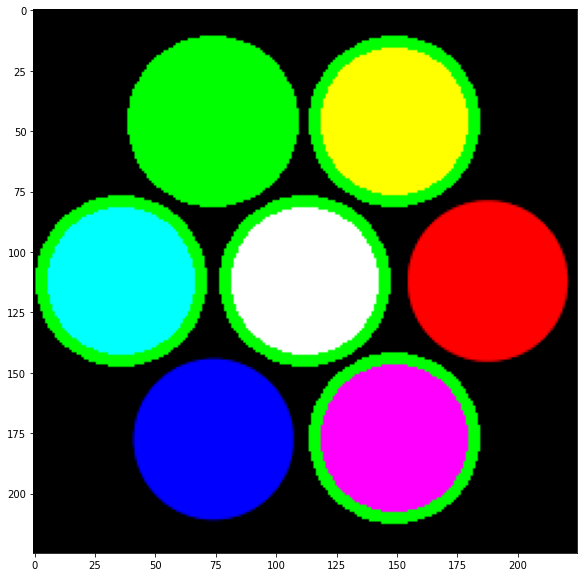

In [15]:
# Create a copy of the original image.
imageCopy7 = image.copy()
for cnt in contours:
    # Circle fitting.
    ((x,y),radius) = cv2.minEnclosingCircle(cnt)
    cv2.circle(imageCopy7, (int(x),int(y)), int(round(radius)), (0,255,0), 4)
plt.imshow(imageCopy7[:,:,::-1])

On the other hand, ellipse fitting can be compared with rotated bounding box that covers leaves minimum extra area. Note that we can fit an ellipse only when the contour has atleast 5 points.

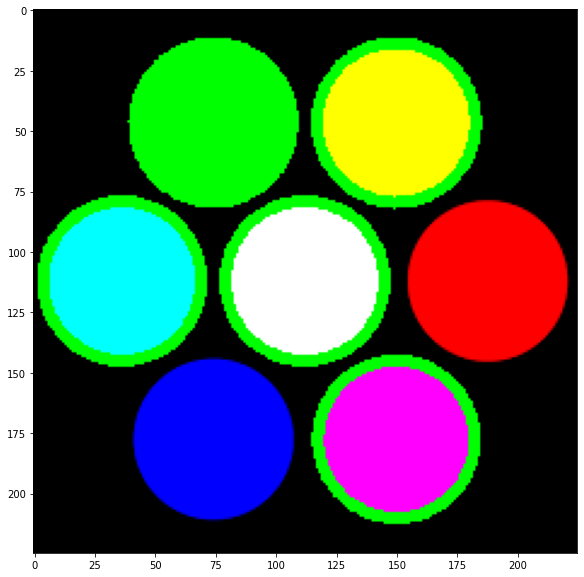

In [16]:
# Create a copy of the original image.
imageCopy8 = image.copy()
for cnt in contours:
    if len(cnt) < 5:
        continue
    # Ellipse fitting.
    ellipse = cv2.fitEllipse(cnt)
    cv2.ellipse(imageCopy8, ellipse, (0,255,0), 4)
plt.imshow(imageCopy8[:,:,::-1])